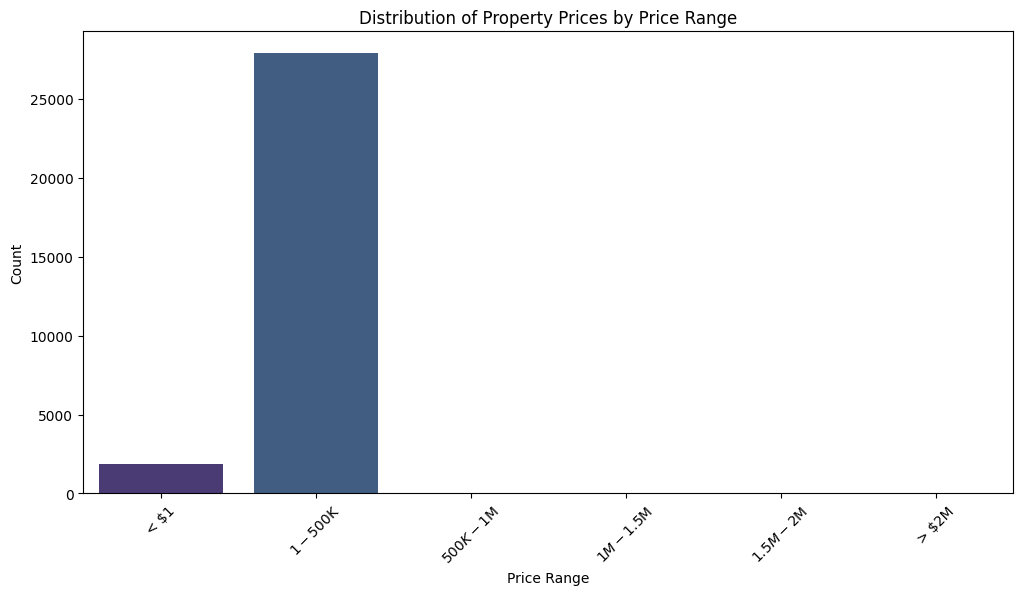

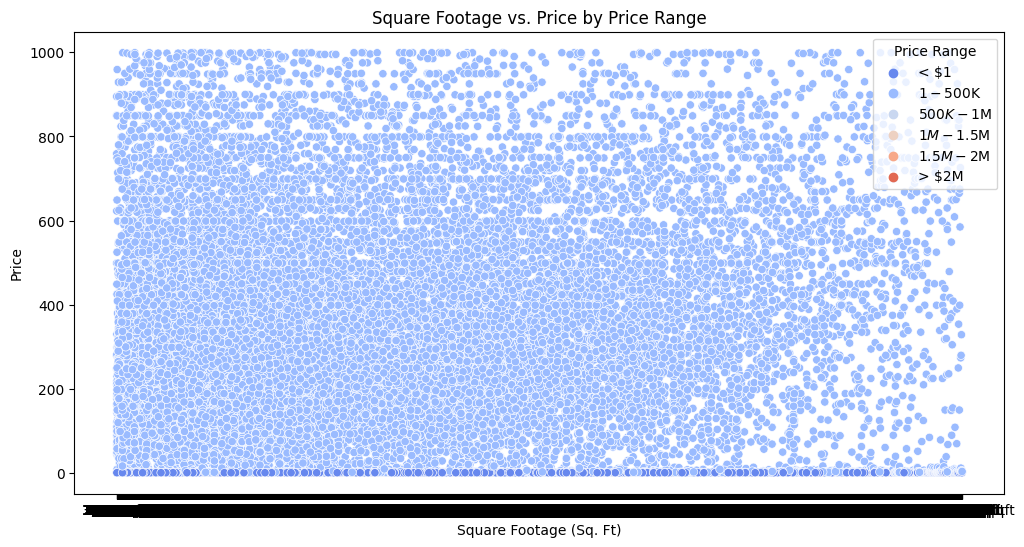

<ipython-input-2-476748b93d8a>:52: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='coolwarm')


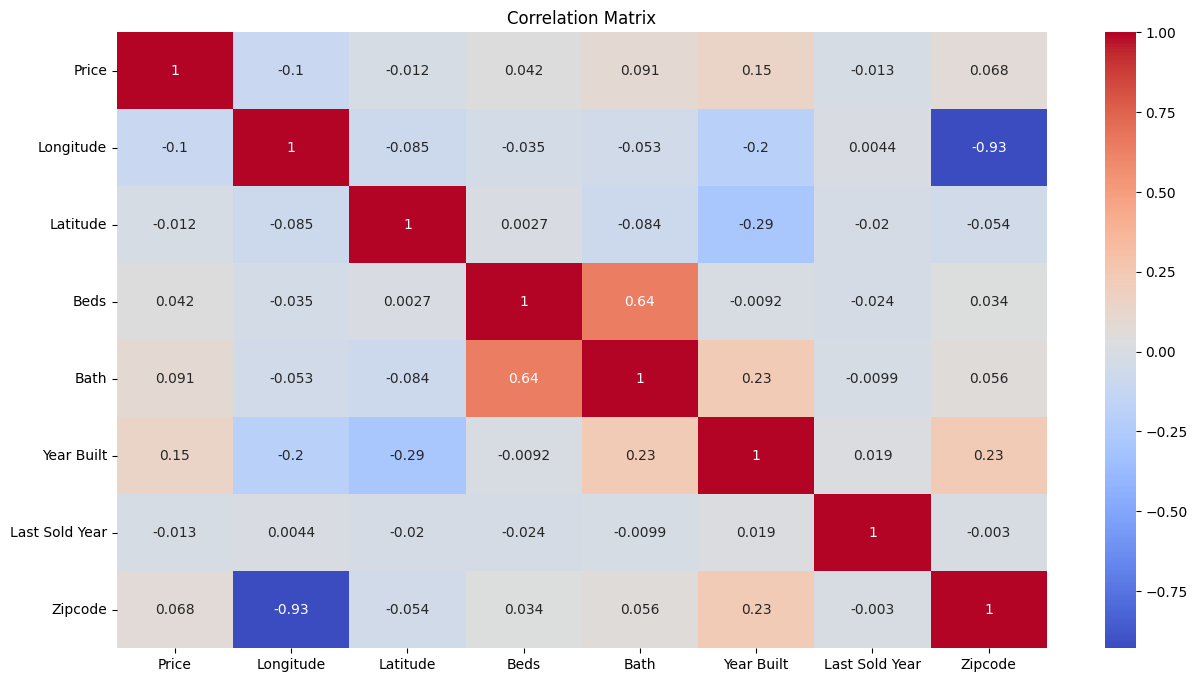

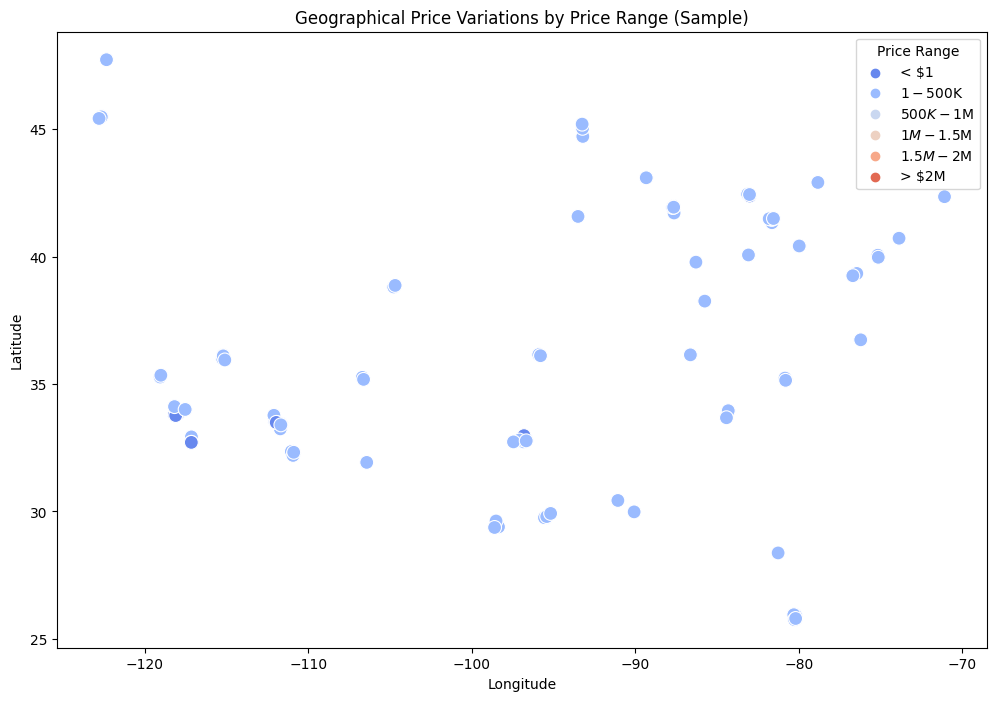

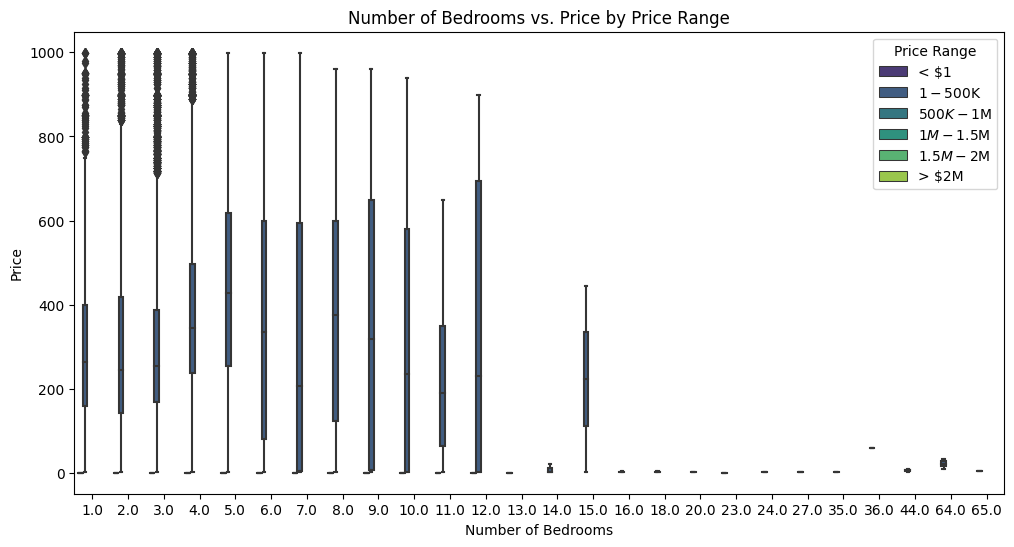

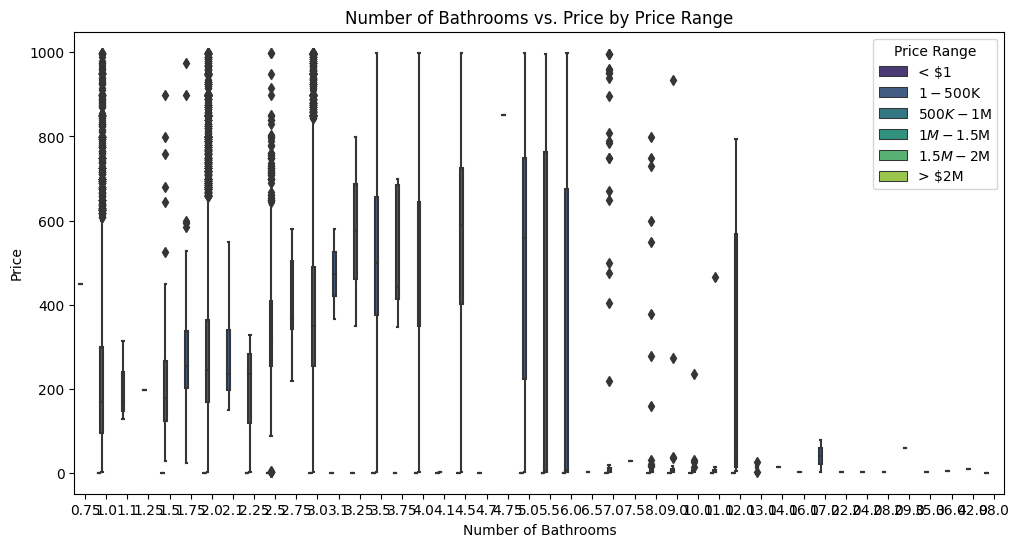

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Load your dataset
data = pd.read_csv('/content/houseprice (1).csv')

# Step 1: Clean and Convert the "Price" Column
def clean_and_convert_price(price_str):
    try:
        # Extract numeric values using regular expressions
        numeric_values = re.findall(r'\d+', price_str)
        if numeric_values:
            return float(numeric_values[0])  # Convert to float or int as needed
        else:
            return None
    except:
        return None

data['Price'] = data['Price'].apply(clean_and_convert_price)

# Drop rows with missing or non-numeric values in the "Price" column
data.dropna(subset=['Price'], inplace=True)

# Step 2: Define Price Range Bins
price_bins = [0, 1, 500000, 1000000, 1500000, 2000000, float('inf')]
price_labels = ['< $1', '$1 - $500K', '$500K - $1M', '$1M - $1.5M', '$1.5M - $2M', '> $2M']

# Create a new column 'Price Range' based on the price bins
data['Price Range'] = pd.cut(data['Price'], bins=price_bins, labels=price_labels, include_lowest=True)

# Visualize the distribution of property prices in price ranges using a count plot
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='Price Range', palette='viridis')
plt.title('Distribution of Property Prices by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Visualize the relationship between square footage and price by price range
plt.figure(figsize=(12, 6))
sns.scatterplot(data=data, x='Sqr Ft', y='Price', hue='Price Range', palette='coolwarm')
plt.title('Square Footage vs. Price by Price Range')
plt.xlabel('Square Footage (Sq. Ft)')
plt.ylabel('Price')
plt.show()

# Create a correlation matrix to see the relationships between features
plt.figure(figsize=(15, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Visualize geographical price variations by price range
plt.figure(figsize=(12, 8))
sns.scatterplot(data=data.head(100), x='Longitude', y='Latitude', hue='Price Range', palette='coolwarm', legend='full', s=100)
plt.title('Geographical Price Variations by Price Range (Sample)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Visualize the impact of the number of bedrooms and bathrooms on price by price range
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='Beds', y='Price', hue='Price Range', palette='viridis')
plt.title('Number of Bedrooms vs. Price by Price Range')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='Bath', y='Price', hue='Price Range', palette='viridis')
plt.title('Number of Bathrooms vs. Price by Price Range')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Price')
plt.show()


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

# Load your dataset
data = pd.read_csv('/content/houseprice (1).csv')

# Data Preprocessing
# Clean and convert the 'Sqr Ft' column
data['Sqr Ft'] = data['Sqr Ft'].str.replace(',', '', regex=True)  # Remove commas
data['Sqr Ft'] = data['Sqr Ft'].str.replace(' sqft', '', regex=True)  # Remove 'sqft'
data['Sqr Ft'] = data['Sqr Ft'].astype(float)  # Convert to float

# Clean and convert the 'Price' column
data['Price'] = data['Price'].str.replace('$', '', regex=False)  # Remove dollar signs
data['Price'] = data['Price'].str.replace(',', '', regex=False)  # Remove commas
data['Price'] = data['Price'].str.strip()  # Remove leading/trailing spaces
data['Price'] = data['Price'].apply(lambda x: float(x) if x.replace('.', '', 1).isdigit() else None)

# Drop rows with missing values in the 'Price' column
data.dropna(subset=['Price'], inplace=True)

# Drop rows with missing values in other selected columns
data.dropna(subset=['Sqr Ft', 'Longitude', 'Latitude', 'Beds', 'Bath', 'Year Built'], inplace=True)

# Define the features and target variable
X = data[['Sqr Ft', 'Longitude', 'Latitude', 'Beds', 'Bath', 'Year Built']]
y = data['Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an imputer
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data
imputer.fit(X_train)

# Transform both the training and testing data
X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

# Create a Linear Regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the model's performance metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

# You can also access the model's coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_
print("Coefficients:", coefficients)
print("Intercept:", intercept)


Mean Squared Error (MSE): 559422306248.0695
R-squared (R2): 0.24572340570687856
Coefficients: [ 7.82920477e-04 -5.58339421e+03 -4.11103736e+03 -1.04727627e+05
  4.63720157e+05 -4.61937763e+03]
Intercept: 8430583.694139816


In [3]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load your dataset
data = pd.read_csv('/content/houseprice (1).csv')

# Data Preprocessing
# Clean and convert the 'Price' column
data['Price'] = data['Price'].str.replace('$', '', regex=False)  # Remove dollar signs
data['Price'] = data['Price'].str.replace(',', '', regex=False)  # Remove commas
data['Price'] = data['Price'].str.strip()  # Remove leading/trailing spaces
data['Price'] = data['Price'].apply(lambda x: float(x) if x.replace('.', '', 1).isdigit() else None)

# Drop rows with missing values in the 'Price' column
data.dropna(subset=['Price'], inplace=True)

# Perform clustering based on the 'Price' column using K-Means
X = data[['Price']]
kmeans = KMeans(n_clusters=3)  # You can adjust the number of clusters as needed
data['Price Cluster'] = kmeans.fit_predict(X)

# Define the features for the classification model
X = data[['Price Cluster']]
y = data['Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Logistic Regression model for allocation
model = LogisticRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model (accuracy score)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Classification Model: {accuracy}")

# You can use this model to allocate new houses to designated teams based on clustering results.


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy of the Classification Model: 0.009409304756926294
